# HOMEWORK 5

In this homework you are going to implement the **Floyd-Steinberg dithering** algorithm. Dithering, in general, means that we are adding noise to the signal (in our case digital image) in order to perceive it better. In other words, by adding the noise the objective quality will be worse but the subjective quality will be better (i.e. the image will "look" better).

The details of FS dithering can be found in this [wiki](https://en.wikipedia.org/wiki/Floyd%E2%80%93Steinberg_dithering) page. In order to implement the dithering, we will implement the following steps:
* Define colour pallette
* Quantize the image to obtain the baseline and compute the average quantization error
* Implement FS dithering and compute the average quantization error

You will also have to answer the question at the end of this notebook.

Note: In this homework, you will have the chance to earn some extra points. See the "Bonus" section at the end of the notebook. Good luck!

As always, you are encouraged to use your own images :-)

In [33]:
import cv2
import math
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

Let's load the image.

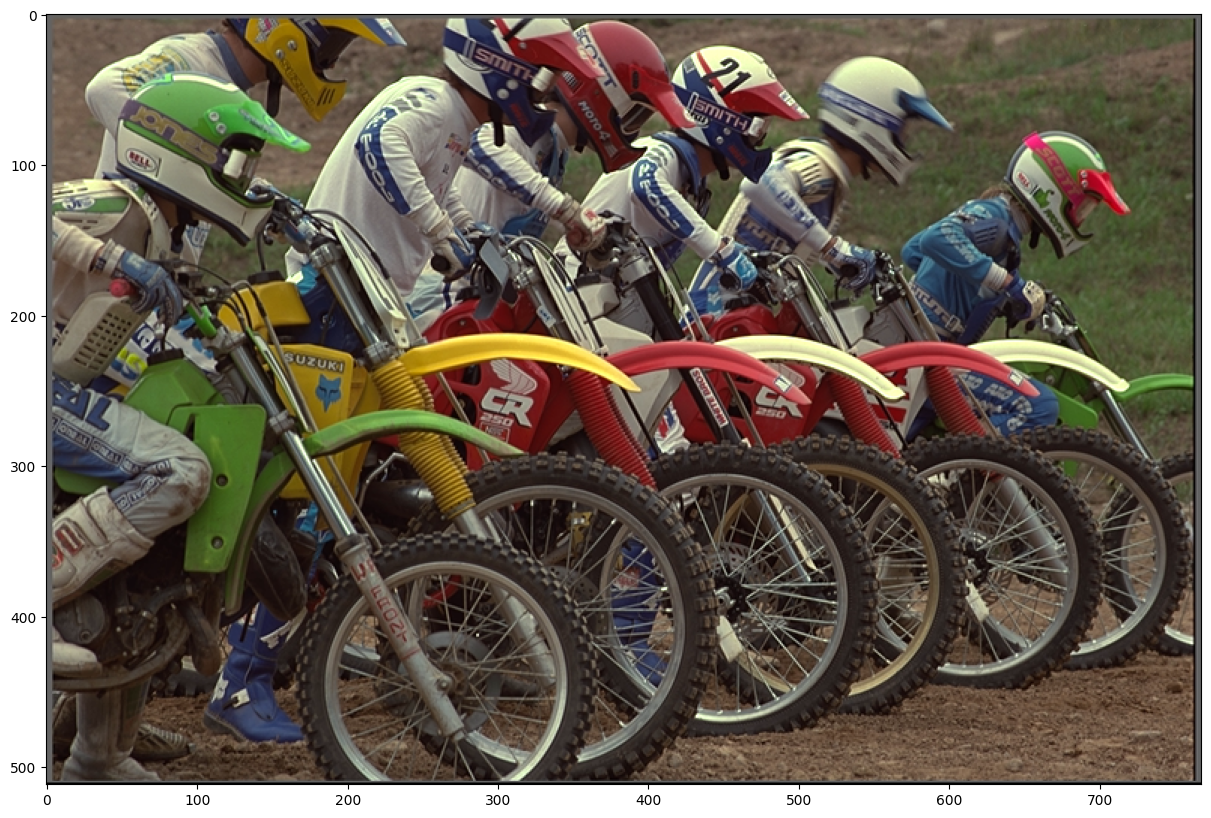

In [34]:
# Load image
img = cv2.imread('../data/kodim05.png')
# Convert it to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# Plot it
plt.imshow(img)

Let's start with gray tones first.

In [35]:
# Black, dark gray, light gray, white
four_colors = np.array([[0, 0, 0],
                   [64, 64, 64],
                   [192, 192, 192],
                   [255, 255, 255]])

Using the colour pallette, let's quantize the original image.

In [36]:
def optimally_quantized(pallete, image):

    optimal_output = image.copy().astype(np.float32)
    
    # Apply quantization
    for r in range(optimal_output.shape[0]):
        for c in range(optimal_output.shape[1]):
            # Extract the original pixel value
            pixel = optimal_output[r, c]
            distances = np.sqrt(np.sum((pallete - pixel)**2, axis=1))
        
            # Find the closest colour from the pallette (using absolute value/Euclidean distance)
            # Note: You may need more than one line of code here
            new_pixel = pallete[np.argmin(distances)]

            # Apply quantization
            optimal_output[r, c] = new_pixel
    
    return optimal_output

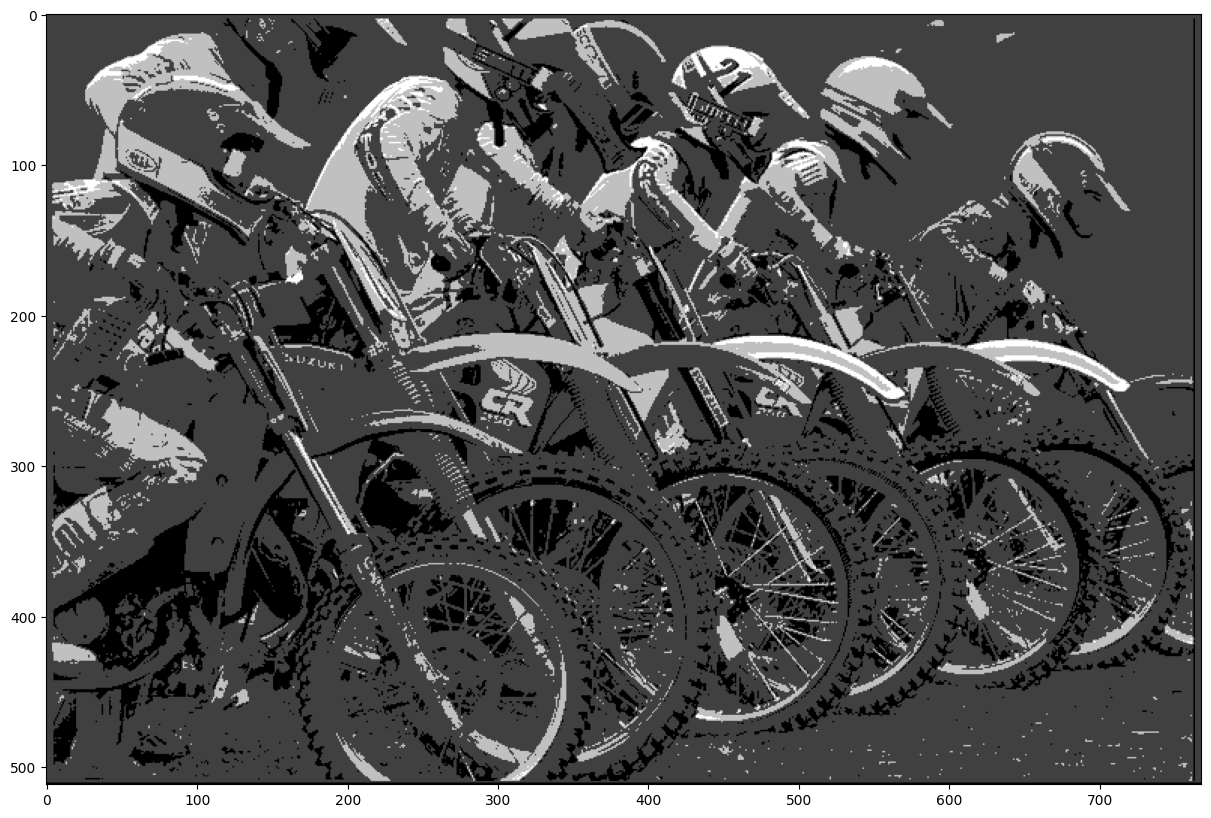

In [37]:
# Show quantized image (don't forget to cast back to uint8)
quantized = optimally_quantized(four_colors, img)
plt.imshow(quantized.astype(np.uint8))

In [38]:
# Compute average quantization error
avg_quant_error = np.mean((img - quantized)**2)
print('Quantization error', avg_quant_error)

Quantization error 1073.9053


#### Floyd-Steinberg Dithering
We are now going to implement the FS dithering and compare it to the optimally quantized image we have calculated above.

In [39]:
def dithering(pallete, image):
    
    # Make a temporal copy of the original image, we will need it for error diffusion
    dither_output = image.copy().astype(np.float32)

    for y in range(dither_output.shape[0] - 1):
        for x in range(1, dither_output.shape[1] - 1):
            # Get the original pixel's color
            old_pixel = img[y, x]

            # Find the closest color from the palette
            distances = np.sqrt(np.sum((pallete - old_pixel)**2, axis=1))
            new_pixel = pallete[np.argmin(distances)]

            # Set the pixel to the new color
            dither_output[y, x] = new_pixel

            # Calculate the quantization error
            quant_error = old_pixel - new_pixel

            # Apply Floyd-Steinberg dithering
            dither_output[y, x+1] += quant_error * 7 / 16
            dither_output[y+1, x-1] += quant_error * 3 / 16
            dither_output[y+1, x] += quant_error * 5 / 16
            dither_output[y+1, x+1] += quant_error * 1 / 16
                    
    return dither_output

(<Axes: >, <matplotlib.image.AxesImage at 0x13db62b3fd0>)

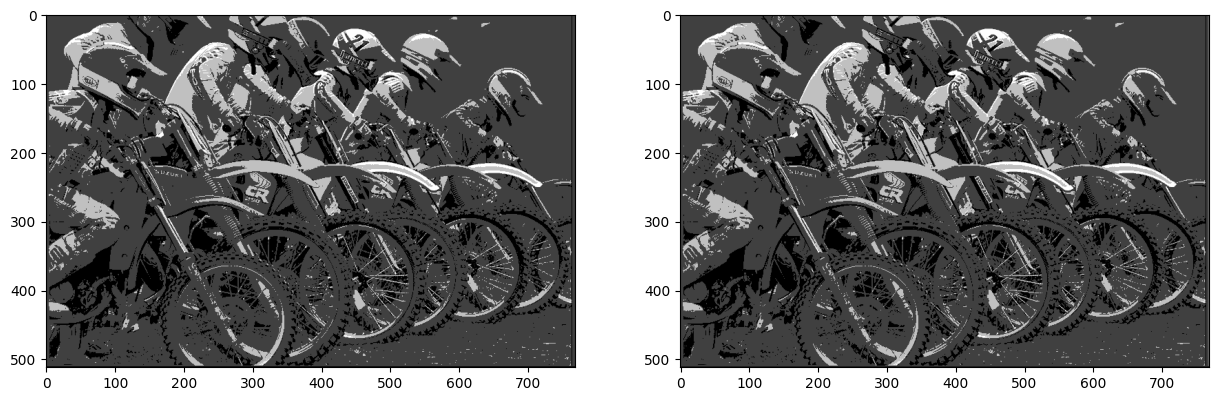

In [40]:
# Show quantized image (don't forget to cast back to uint8)
dithered = dithering(four_colors, img)
plt.subplot(121), plt.imshow(quantized.astype(np.uint8))   # optimally quantized
plt.subplot(122), plt.imshow(dithered.astype(np.uint8))   # dithering

In [41]:
# Compute average quantization error for dithered image
avg_dith_error = np.mean((img - dithered)**2)
print('Quantization error', avg_dith_error)

Quantization error 1071.9346


### Questions
* Which image has higher quantization error? Optimally quantized or dithered?
* Which image looks better to you?
* Can you repeat the same process using only two colours: black and white? Show me :-)

Which image has higher quantization error? Optimally quantized or dithered?
Looks like I did something wrong in dithering algorithm but I don't know what. Everything is by the formulas from the algorithm. 
Those images should be different but for me they are looking the same. Quantization error should be smaller for dithered image.

Which image looks better to you?
They are looking the same. But I know dithered image should look much better.

Can you repeat the same process using only two colours: black and white? Show me :-)
Please see below.

(<Axes: >, <matplotlib.image.AxesImage at 0x13db6373750>)

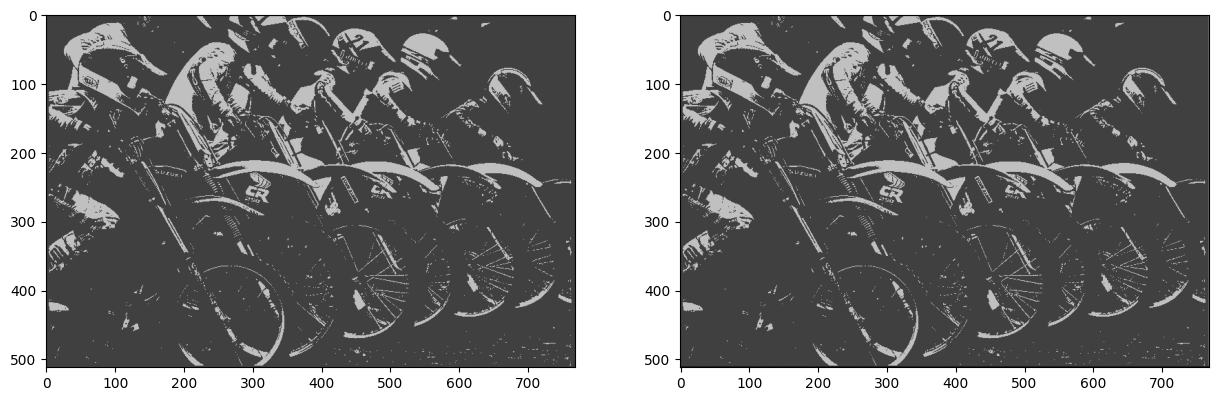

In [42]:
two_colors = np.array([[64, 64, 64], [192, 192, 192]])
quantized = optimally_quantized(two_colors, img)
dithered = dithering(two_colors, img)
plt.subplot(121), plt.imshow(quantized.astype(np.uint8))   # optimally quantized
plt.subplot(122), plt.imshow(dithered.astype(np.uint8))   # dithering

### Bonus Points

Repeat the homework using a diffrerent image pallette. For instance, you can use an optimal colour
pallette that we can calculate via k-means algorithm. The following snippet of code will give you the 16
optimal colours for your original image.

(<Axes: >, <matplotlib.image.AxesImage at 0x13da428d310>)

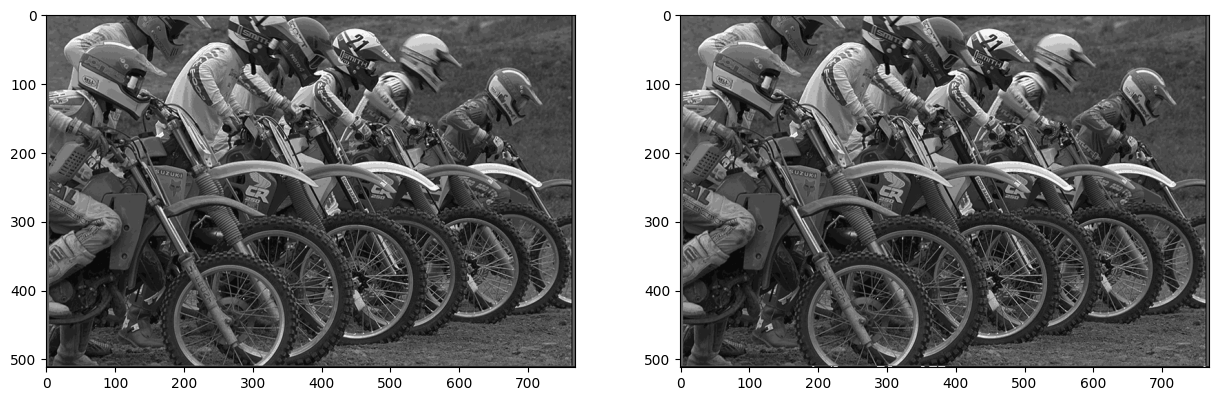

In [43]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=16, n_init=10).fit(np.reshape(img, (-1, 1)))
colors = kmeans.cluster_centers_

quantized = optimally_quantized(colors, img)
dithered = dithering(colors, img)
plt.subplot(121), plt.imshow(quantized.astype(np.uint8))   # optimally quantized
plt.subplot(122), plt.imshow(dithered.astype(np.uint8))  

Apply FS dithering the same way you did before.
* How does the result look like to you?
* What happens if we use 32 colours?
* And what happens if we use 256 colours?

How does the result look like to you?
It is looking very good but for some reason greyscale.

What happens if we use 32 colours?
It should be more colorfull.

And what happens if we use 256 colours?
It should contain all original colors, and even more.
